## Working with a larger example (multiclass classification)

We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as **multiclass classification**.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.

In [1]:
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Importing the data 
(train_data , train_labels),(test_data , test_label) = fashion_mnist.load_data()

In [3]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

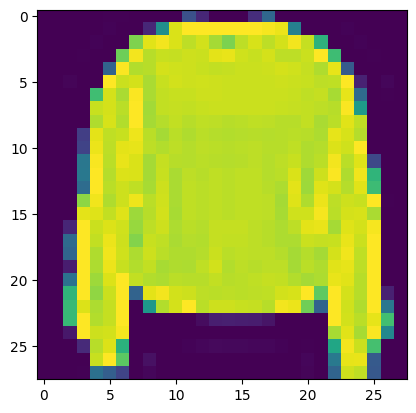

In [5]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

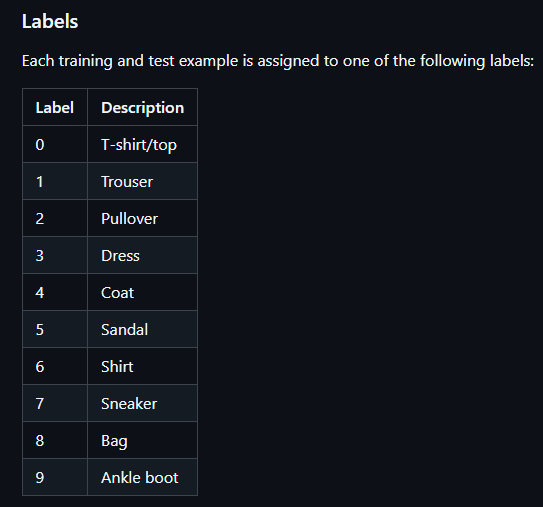

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

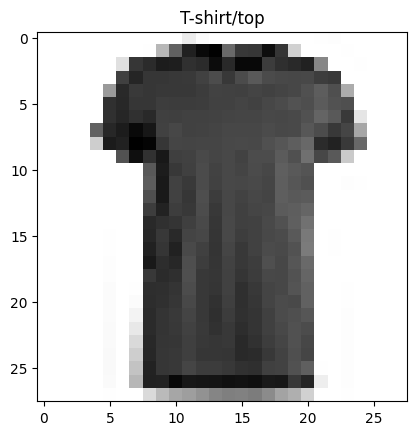

In [7]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

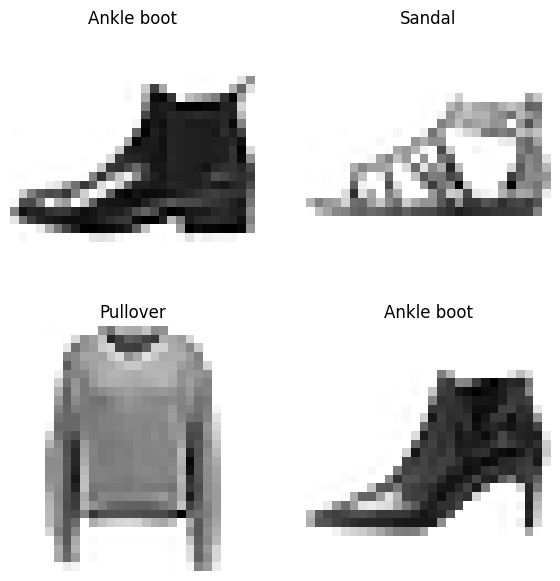

In [8]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

 **Building a Multi-Class Clasification Model**

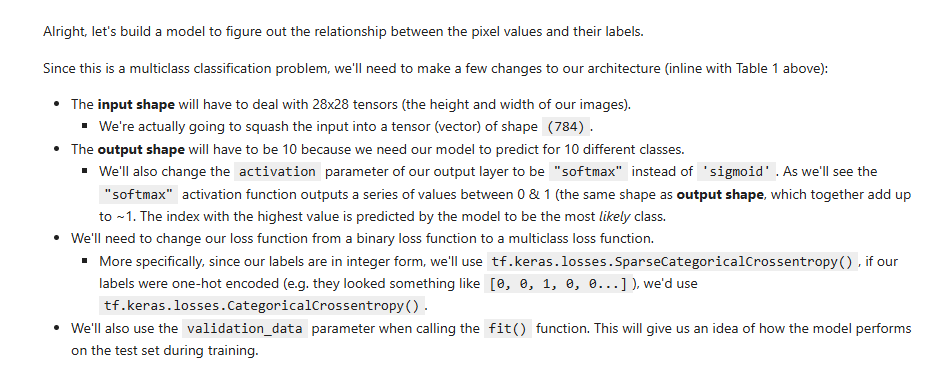

In [9]:
# Set the Seed 
tf.random.set_seed(42)

# Create the Model 
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Input(shape=(28, 28))) # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(4,activation=tf.keras.activations.relu))
model_1.add(tf.keras.layers.Dense(4,activation=tf.keras.activations.relu))
model_1.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)) # output shape is 10, activation is softmax

# Compile the Model 
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # different loss function for multiclass classifcation
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

# Fit the Model 
non_norm_history = model_1.fit(train_data,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data , test_label) # see how the model performs on the test set during training
                              )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0998 - loss: 3.6524 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0986 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - 

**We can train the above model using the different loss fucntion by one_hot encoding the labels**

In [10]:
# Set the Seed 
tf.random.set_seed(42)

# Create the Model 
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Input(shape=(28, 28))) # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(4,activation=tf.keras.activations.relu))
model_1.add(tf.keras.layers.Dense(4,activation=tf.keras.activations.relu))
model_1.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)) # output shape is 10, activation is softmax

# Compile the Model 
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),  # different loss function for multiclass classifcation
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=["accuracy"])

# Fit the Model 
non_norm_history = model_1.fit(train_data,
                              tf.one_hot(train_labels , depth=10),
                              epochs=10,
                              validation_data=(test_data , tf.one_hot(test_label , depth=10)) # see how the model performs on the test set during training
                              )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0987 - loss: 4.4940 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0989 - loss: 2.3029 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0985 - loss: 2.3028 - 

In [11]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

Alright, our model gets to about ~35% accuracy after 10 epochs using a similar style model to what we used on our binary classification problem.

Which is better than guessing (guessing with 10 classes would result in about 10% accuracy) but we can do better.

Do you remember when we talked about neural networks preferring numbers between 0 and 1? (if not, treat this as a reminder)

Well, right now, the data we have isn't between 0 and 1, in other words, it's not normalized (hence why we used the non_norm_history variable when calling fit()). It's pixel values are between 0 and 255.

Let's see.

In [12]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(np.uint8(0), np.uint8(255))

In [13]:
train_data_norm = train_data/255 
test_data_norm = test_data/255 
train_data_norm.min(), train_data_norm.max()

(np.float64(0.0), np.float64(1.0))

**Let's train a new Model on this Normalized Data**

In [18]:
# Setting the seed 
tf.random.set_seed(50)

# Model Building 
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Input(shape=(28,28)))
model_2.add(tf.keras.layers.Flatten())
model_2.add(tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu))
model_2.add(tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu))
model_2.add(tf.keras.layers.Dense(10 , activation=tf.keras.activations.softmax))

# Model Compiling 

model_2.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=tf.keras.losses.CategoricalCrossentropy() ,
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)


# Fitting the Model 
norm_history=model_2.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10),
            epochs=10,
            validation_data=(test_data_norm, tf.one_hot(test_label , depth=10)))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.4362 - loss: 1.4815 - val_categorical_accuracy: 0.6001 - val_loss: 0.9550
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.6381 - loss: 0.8967 - val_categorical_accuracy: 0.6678 - val_loss: 0.8192
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.6950 - loss: 0.7806 - val_categorical_accuracy: 0.7490 - val_loss: 0.7295
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.7690 - loss: 0.6817 - val_categorical_accuracy: 0.7756 - val_loss: 0.6767
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.7931 - loss: 0.6268 - val_categorical_accuracy: 0.7849 - val_loss: 0.6417
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8016 - loss: 0.5954 - val_categorical_accuracy: 0.7897 - val_loss: 0.6207
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy

**We can see just training the model on normalized data improved the accuracy from 32 to 82 !!!**

- **🔑 Note**: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

<Axes: title={'center': 'Normalized Data'}>

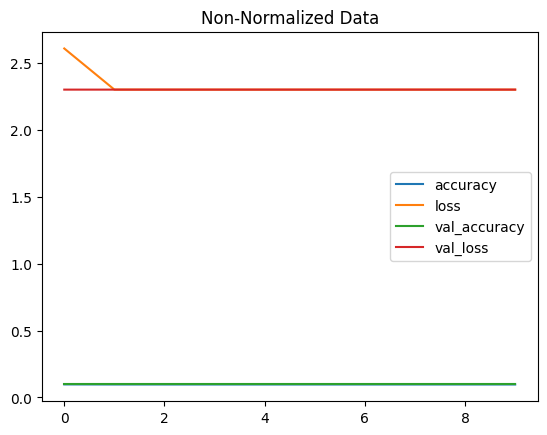

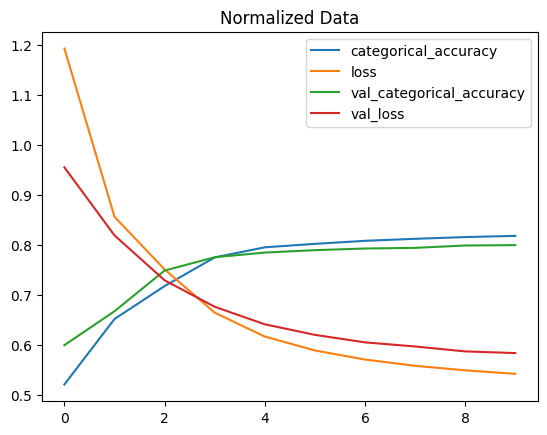

In [19]:
import pandas as pd 

pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

🔑 Note: The same model with even slightly different data can produce dramatically different results. So when you're comparing models, it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data but different architecture).

**Finding ideal Learning Rate**

In [24]:
#setting the seed 
tf.random.set_seed(42)

# Building the Model
model_3  = tf.keras.Sequential()
model_3.add(tf.keras.layers.Input(shape=(28,28)))
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu))
model_3.add(tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu))
model_3.add(tf.keras.layers.Dense(10 , activation=tf.keras.activations.softmax))

# Compiling the Model
model_3.compile(
    optimizer = tf.keras.optimizers.Adam(), 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Create the Learning Rate Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fitting the Model
find_lr_history = model_3.fit(
    train_data_norm , 
    train_labels , 
    epochs=40,
    validation_data = (test_data_norm , test_label), 
    callbacks = [lr_scheduler]
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4478 - loss: 1.5129 - val_accuracy: 0.7008 - val_loss: 0.8497 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7251 - loss: 0.7813 - val_accuracy: 0.7808 - val_loss: 0.6612 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7868 - loss: 0.6351 - val_accuracy: 0.7884 - val_loss: 0.6192 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7942 - loss: 0.5985 - val_accuracy: 0.7913 - val_loss: 0.6025 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7973 - loss: 0.5840 - val_accuracy: 0.7938 - val_loss: 0.5954 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7986 - loss: 0.5765 - val_accuracy: 0.7955 - val_loss: 0.5907 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7993 - l

In [26]:
find_lr_history.history['learning_rate']

[0.0010000000474974513,
 0.0011220184387639165,
 0.001258925418369472,
 0.0014125375309959054,
 0.0015848932089284062,
 0.0017782794311642647,
 0.00199526222422719,
 0.0022387211211025715,
 0.002511886414140463,
 0.0028183830436319113,
 0.003162277629598975,
 0.003548133885487914,
 0.003981071524322033,
 0.004466835875064135,
 0.005011872388422489,
 0.005623413249850273,
 0.0063095735386013985,
 0.007079457864165306,
 0.007943281903862953,
 0.008912509307265282,
 0.009999999776482582,
 0.011220184154808521,
 0.012589254416525364,
 0.01412537507712841,
 0.015848932787775993,
 0.017782794311642647,
 0.019952623173594475,
 0.02238721214234829,
 0.025118865072727203,
 0.02818382903933525,
 0.03162277489900589,
 0.03548133745789528,
 0.03981071710586548,
 0.04466835781931877,
 0.05011872202157974,
 0.05623413249850273,
 0.06309573352336884,
 0.07079457491636276,
 0.07943282276391983,
 0.08912509679794312]

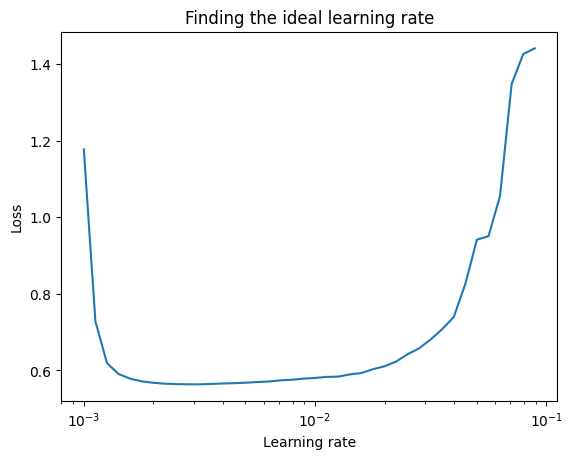

In [27]:
import numpy as np 
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

**From Graph we Can Conclude that 0.001 can be the ideal Learning Rate**

In [29]:
#setting the seed 
tf.random.set_seed(42)

# Building the Model
model_3  = tf.keras.Sequential()
model_3.add(tf.keras.layers.Input(shape=(28,28)))
model_3.add(tf.keras.layers.Flatten())
model_3.add(tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu))
model_3.add(tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu))
model_3.add(tf.keras.layers.Dense(10 , activation=tf.keras.activations.softmax))

# Compiling the Model
model_3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


# Fitting the Model
find_lr_history = model_3.fit(
    train_data_norm , 
    train_labels , 
    epochs=40,
    validation_data = (test_data_norm , test_label)
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4137 - loss: 1.6274 - val_accuracy: 0.6270 - val_loss: 1.0360
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6319 - loss: 0.9830 - val_accuracy: 0.6591 - val_loss: 0.8890
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6559 - loss: 0.8736 - val_accuracy: 0.7139 - val_loss: 0.8000
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7409 - loss: 0.7439 - val_accuracy: 0.7764 - val_loss: 0.6562
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7843 - loss: 0.6302 - val_accuracy: 0.7858 - val_loss: 0.6200
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8001 - loss: 0.5852 - val_accuracy: 0.7980 - val_loss: 0.5893
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8100 - loss: 0.5610 - val_accuracy: 0.8063 - val_loss: 0.5707
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8147 - loss: 0.5448 - 

In [31]:
# Make predictions with the most recent model
y_probs = model_3.predict(test_data_norm) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[2.30940766e-12, 7.23257116e-08, 6.51221969e-13, 1.27599620e-07,
        3.15888399e-10, 2.11664975e-01, 1.95965509e-12, 6.30167052e-02,
        5.48600292e-06, 7.25312591e-01],
       [2.34510540e-03, 2.36537773e-03, 9.01246846e-01, 5.99994382e-04,
        5.79297133e-02, 7.38322292e-10, 3.51805575e-02, 1.32914365e-24,
        3.32452415e-04, 2.15284338e-23],
       [9.18741307e-07, 9.99879479e-01, 1.08646680e-04, 1.97221948e-06,
        8.95344056e-06, 1.02079566e-14, 1.18933077e-08, 3.47775399e-35,
        1.17557596e-11, 5.16615544e-32],
       [1.24935056e-07, 9.99929309e-01, 1.83680947e-06, 5.11108010e-05,
        1.75983332e-05, 7.53230291e-12, 4.56952076e-09, 1.44695521e-33,
        3.35397270e-12, 2.21779249e-27],
       [3.55078951e-02, 1.29416597e-03, 9.11677629e-02, 1.26225397e-01,
        1.17194280e-01, 1.71065949e-05, 6.21913373e-01, 1.22134501e-16,
        6.67997170e-03, 7.31499767e-13]], dtype=float32)

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.

In [34]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [35]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_label,
                 y_pred=y_preds)

array([[770,   5,  22,  81,   2,   0, 111,   0,   9,   0],
       [  2, 955,  11,  28,   1,   0,   3,   0,   0,   0],
       [ 24,   4, 772,  18,  75,   0, 103,   0,   4,   0],
       [ 32,  30,  11, 844,  25,   3,  48,   2,   3,   2],
       [  0,   4, 217,  44, 630,   1,  96,   0,   8,   0],
       [  1,   0,   0,   2,   0, 878,   0,  61,  10,  48],
       [151,   2, 122,  65, 102,   0, 533,   0,  25,   0],
       [  0,   0,   0,   0,   0,  27,   0, 953,   0,  20],
       [  2,   0,   3,   8,   3,  19,  36,   7, 919,   3],
       [  0,   0,   0,   0,   0,  18,   0,  55,   1, 926]])

In [37]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

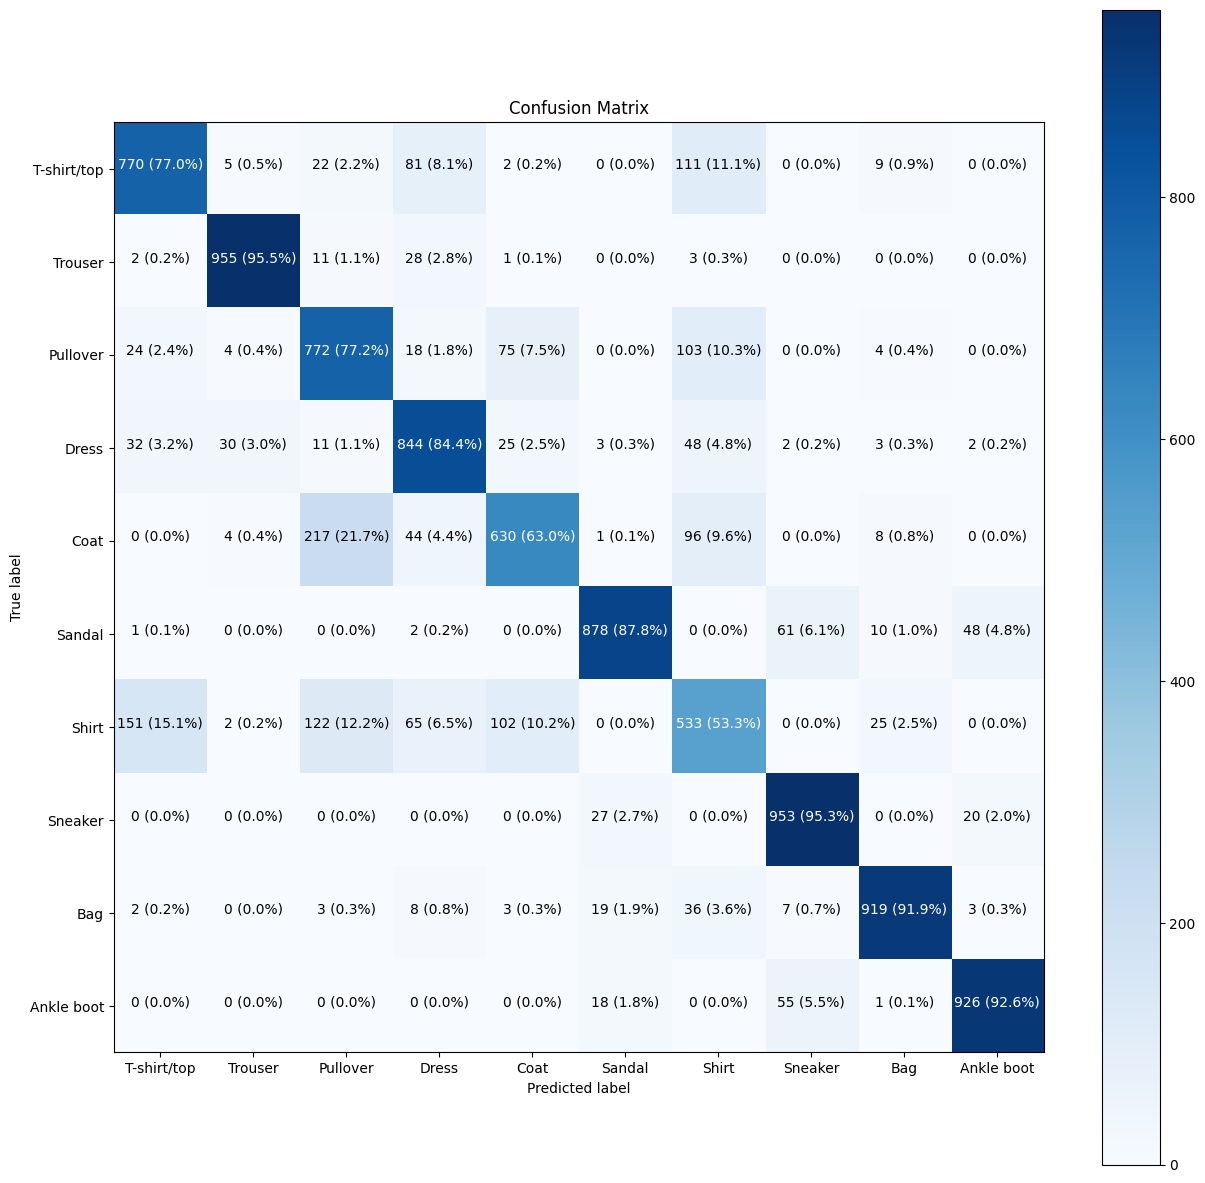

In [39]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_label,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

🔑 Note: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

#### What patterns is our model learning?

In [41]:
# Find the layers of our most recent model
model_3.layers

[<Flatten name=flatten_8, built=True>,
 <Dense name=dense_33, built=True>,
 <Dense name=dense_34, built=True>,
 <Dense name=dense_35, built=True>]

The get_weights() method returns the weights (also known as a weights matrix) and biases (also known as a bias vector) of a particular layer.

In [42]:

# Get the patterns of a layer in our network
weights, biases = model_3.layers[1].get_weights()

# Shape = 1 weight matrix the size of our input data (28x28) per neuron (4)
weights, weights.shape
     

(array([[-0.24425888, -0.09782205,  1.0949523 ,  0.2817468 ],
        [-0.35555452,  0.37184983,  1.0374771 ,  0.6656492 ],
        [-1.3785574 , -0.86897314, -0.2234891 , -0.76031363],
        ...,
        [-0.21881938, -0.28357467,  0.02382091,  0.5299072 ],
        [ 0.38255218,  0.24917361,  1.9007847 ,  1.2985734 ],
        [-0.38606462, -0.53081137,  0.15045945,  0.0315618 ]],
       dtype=float32),
 (784, 4))

In [43]:
model_3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

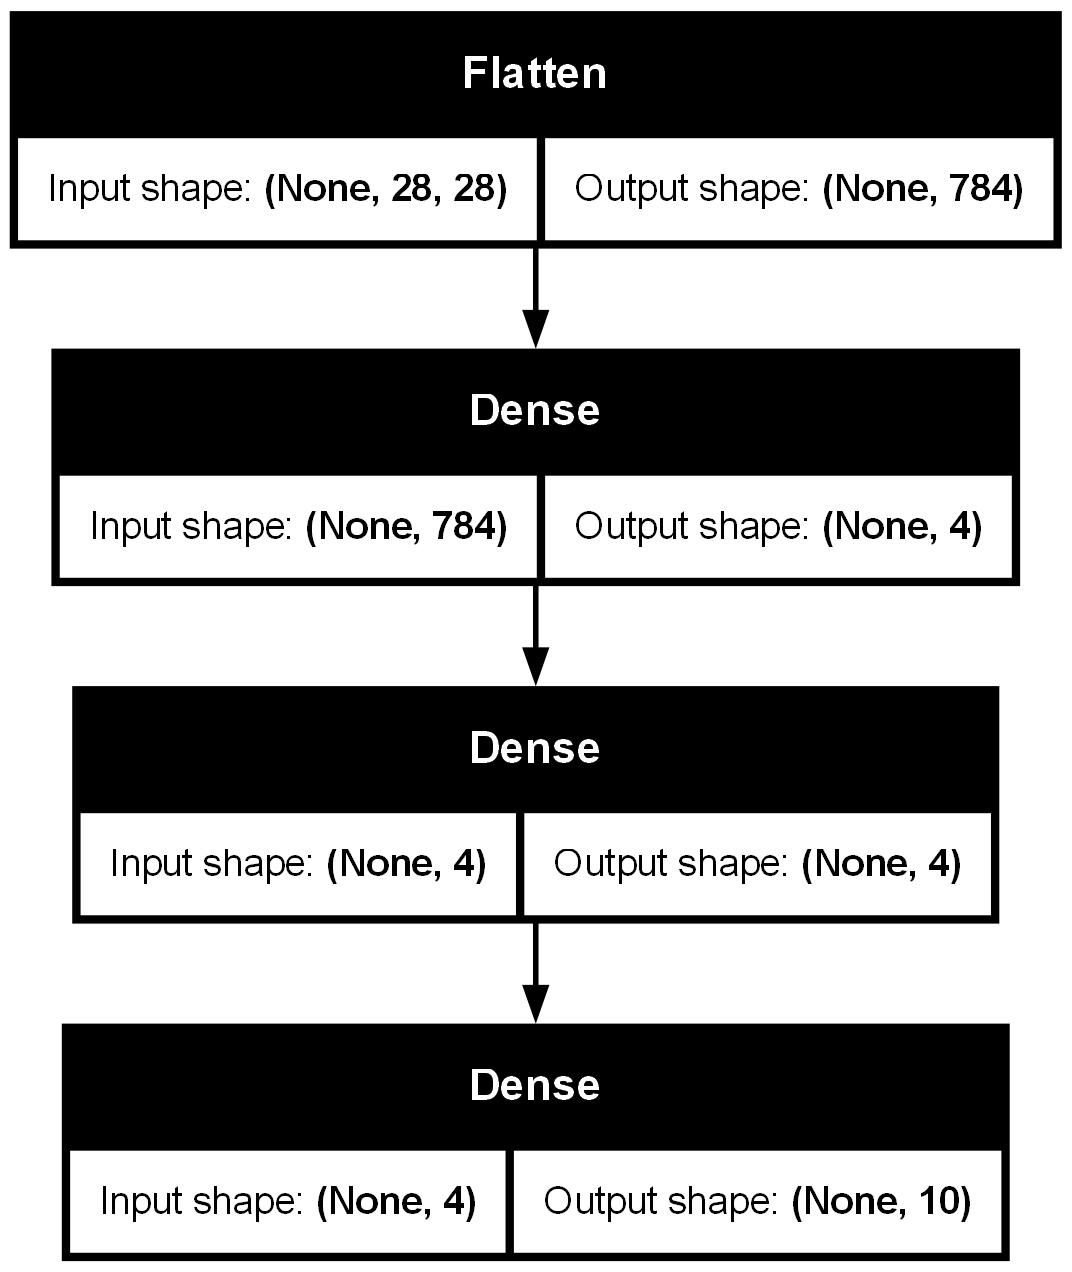

In [44]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_3, show_shapes=True)

**How a model learns (in brief)**

Alright, we've trained a bunch of models, but we've never really discussed what's going on under the hood. So how exactly does a model learn?

A model learns by updating and improving its weight matrices and biases values every epoch (in our case, when we call the fit() fucntion).

It does so by comparing the patterns its learned between the data and labels to the actual labels.

If the current patterns (weight matrices and bias values) don't result in a desirable decrease in the loss function (higher loss means worse predictions), the optimizer tries to steer the model to update its patterns in the right way (using the real labels as a reference).

This process of using the real labels as a reference to improve the model's predictions is called backpropagation.

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.